<a href="https://colab.research.google.com/github/dantidn/SAHASTA-Machine-Learning/blob/main/SAHASTA_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Unduh dataset gambar dan nutrisi
!gdown 1ev9u5wgkyas7D1FS3o-ObmrLyu1K6-PX # Dataset gambar
!gdown 1jixKLnexcz37pgkchiq7ZuWQguM9gNs6 # Dataset nutrisi (CSV)

Downloading...
From (original): https://drive.google.com/uc?id=1ev9u5wgkyas7D1FS3o-ObmrLyu1K6-PX
From (redirected): https://drive.google.com/uc?id=1ev9u5wgkyas7D1FS3o-ObmrLyu1K6-PX&confirm=t&uuid=f94d3e94-20cd-4a67-bab4-18f1a4913cf1
To: /content/dataset_food.zip
100% 179M/179M [00:03<00:00, 52.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jixKLnexcz37pgkchiq7ZuWQguM9gNs6
To: /content/data_nutrisi.csv
100% 545/545 [00:00<00:00, 1.89MB/s]


In [ ]:
import zipfile # Import the zipfile module

# Ekstraksi dataset gambar
zip_path = "dataset_food.zip"  # Nama file zip dataset gambar
extract_dir = "dataset_food"   # Direktori tujuan untuk mengekstrak

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
train_data_dir = "/content/dataset_food/dataset_food/train"
val_data_dir = "/content/dataset_food/dataset_food/validation"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 960 images belonging to 20 classes.
Found 120 images belonging to 20 classes.


In [ ]:
# Upload CSV ke Colab (contoh file: nutrition.csv)
nutrition_path = "/content/data_nutrisi.csv"
nutrition_data = pd.read_csv(nutrition_path)

# Lihat isi data
print(nutrition_data.head())

      Food  Calcium (mg)  Protein (g)  Carbohydrate (g)  Fat (g)  \
0  Alpukat            13          6.0               9.0     14.0   
1   Anggur            10         25.0              18.0      0.2   
2     Apel             2         10.0              14.0      0.4   
3    Bayam            99          0.8               0.4      0.4   
4  Brokoli            47          1.1               7.0      0.4   

   Calorie (kcal)  
0             160  
1              69  
2              52  
3              23  
4              34  


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Lihat ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,638,932 (40.58 MB)

 Trainable params: 10,638,932 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0831 - loss: 3.3877 - val_accuracy: 0.1500 - val_loss: 2.6270
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.3249 - loss: 2.3017 - val_accuracy: 0.1667 - val_loss: 2.6959
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4690 - loss: 1.6232 - val_accuracy: 0.3083 - val_loss: 2.6290
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7383 - loss: 0.9886 - val_accuracy: 0.3167 - val_loss: 2.6730
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8788 - loss: 0.4721 - val_accuracy: 0.3583 - val_loss: 3.0814
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


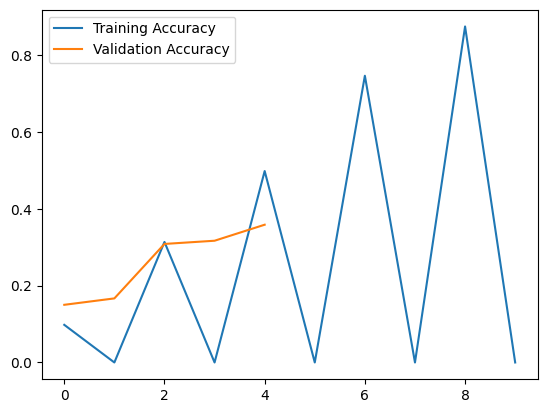

In [ ]:
# Plot akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


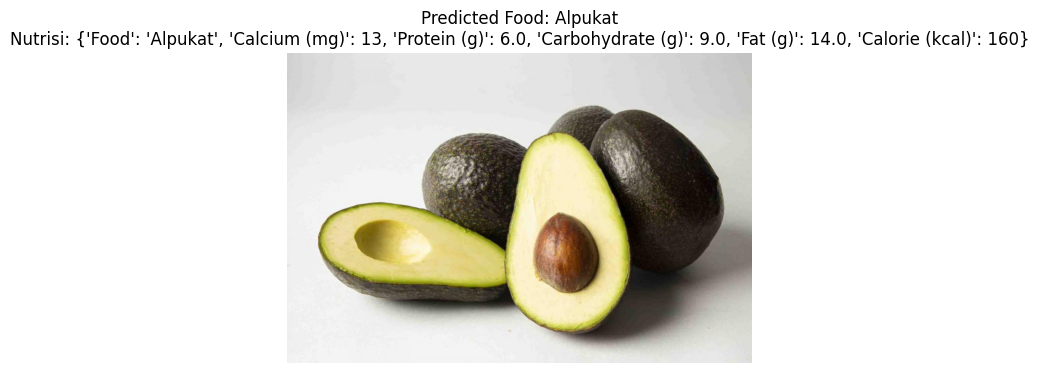

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk prediksi dan menampilkan gambar
def predict_and_display(img_path, model, class_labels, nutrition_data):
    # Load gambar
    img = image.load_img(img_path, target_size=(150, 150))  # Sesuaikan ukuran dengan model
    img_array = image.img_to_array(img) / 255.0  # Normalisasi nilai pixel
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimensi

    # Prediksi menggunakan model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Ambil kelas dengan probabilitas tertinggi

    # Dapatkan label prediksi
    predicted_label = class_labels[predicted_class]

    # Ambil data nutrisi dari CSV berdasarkan label prediksi
    nutrition_info = nutrition_data[nutrition_data['Food'] == predicted_label]

    # Tampilkan gambar beserta prediksi
    plt.figure(figsize=(6, 6))
    plt.imshow(image.load_img(img_path))  # Tampilkan gambar asli
    plt.axis('off')  # Hilangkan sumbu
    plt.title(f"Predicted Food: {predicted_label}\nNutrisi: {nutrition_info.iloc[0].to_dict()}")
    plt.show()

# Contoh penggunaan
img_path = "/content/dataset_food/dataset_food/train/Alpukat/Alpukat_10.jpg"  # Path gambar uji
class_labels = list(train_data.class_indices.keys())  # Label kelas dari dataset
predict_and_display(img_path, model, class_labels, nutrition_data)

In [ ]:
# Simpan model dalam format .h5
model.save("best_model.h5")

# Simpan dalam format TensorFlow SavedModel
saved_model_path = "./saved_model"
model.save(saved_model_path + ".h5")

In [ ]:
# Install TensorFlow.js
!pip install tensorflowjs

In [ ]:
# 2. Load your Keras model
import tensorflow as tf
model = tf.keras.models.load_model("best_model.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 4. Convert the SavedModel to TensorFlow.js format
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model --signature_name=serving_default --saved_model_tags=serve ./saved_model ./tfjs_model

# 5. Compress the TensorFlow.js model folder
import shutil
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')

# 6. Download the compressed model
from google.colab import files
files.download('tfjs_model.zip')

2024-12-13 04:54:07.912507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734065647.957886    4566 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734065647.971145    4566 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-package

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>